# Iris end to end deployment project 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Step 2 - Perform basic data quality checks

In [4]:
df.shape

(150, 5)

In [5]:
df.duplicated().sum()

np.int64(1)

In [7]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(149, 5)

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Step 3 - Seperate X and Y(species)

In [9]:
X = df.drop(columns = ["species"])
Y = df["species"]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [12]:
Y.value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

<Axes: xlabel='species'>

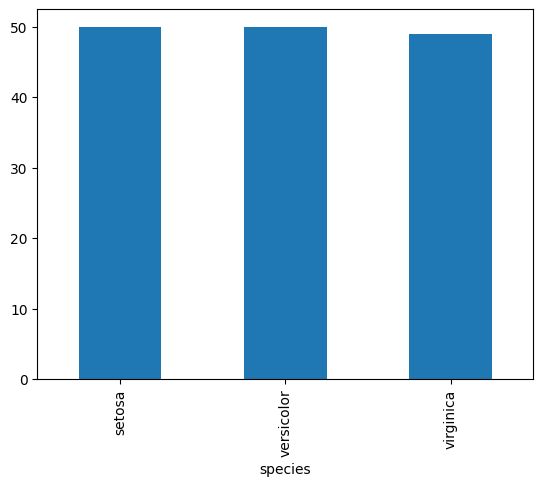

In [13]:
Y.value_counts().plot(kind="bar")

# Step 4 - Apply train test split

In [14]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=21)

In [15]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
52,6.9,3.1,4.9,1.5
49,5.0,3.3,1.4,0.2
65,6.7,3.1,4.4,1.4
117,7.7,3.8,6.7,2.2
55,5.7,2.8,4.5,1.3


In [16]:
ytrain.head()

52     versicolor
49         setosa
65     versicolor
117     virginica
55     versicolor
Name: species, dtype: object

In [17]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,5.8,2.6,4.0,1.2
44,5.1,3.8,1.9,0.4
7,5.0,3.4,1.5,0.2
21,5.1,3.7,1.5,0.4
95,5.7,3.0,4.2,1.2


In [18]:
ytest.head()

92    versicolor
44        setosa
7         setosa
21        setosa
95    versicolor
Name: species, dtype: object

In [19]:
xtrain.shape

(99, 4)

In [20]:
xtest.shape

(50, 4)

# Step 5 - Build pipeline and model

In [21]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    LogisticRegression(random_state=42)
)

cv_scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")
print(f"5 Fold Cross Validation Scores : {cv_scores}")
print(f"Average : {cv_scores.mean():.4f}")
print(f"Standard deviation : {cv_scores.std():.4f}")

5 Fold Cross Validation Scores : [0.95213675 1.         1.         0.8968254  1.        ]
Average : 0.9698
Standard deviation : 0.0409


In [24]:
model.fit(xtrain, ytrain)

,steps,"[('simpleimputer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


# Evaluate the model

In [26]:
model.score(xtrain, ytrain)

0.9797979797979798

In [27]:
model.score(xtest, ytest)

0.94

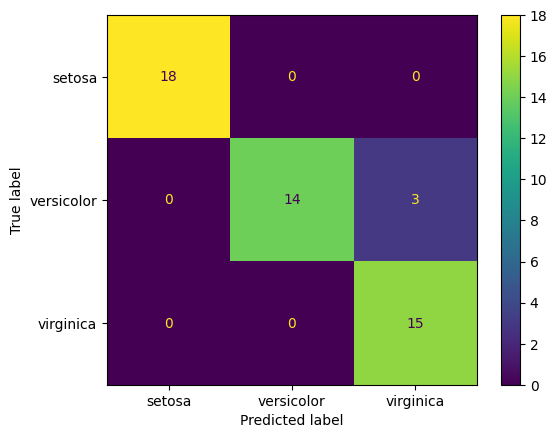

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [29]:
from sklearn.metrics import classification_report

ypred_test = model.predict(xtest)
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      0.82      0.90        17
   virginica       0.83      1.00      0.91        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



# Save the model object

In [30]:
import joblib

joblib.dump(model, "iris_model.joblib")

['iris_model.joblib']

# Load the model object

In [31]:
m = joblib.load("iris_model.joblib")
m

,steps,"[('simpleimputer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [32]:
m.score(xtrain, ytrain)

0.9797979797979798

In [33]:
m.score(xtest, ytest)

0.94